# #1. IDEATION

## #1.1 Business Problem



*   List item
*   List item



## #1.2 ML

INSTALL LIBRARY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy matplotlib seaborn plotly
!pip install scikit-learn xgboost lightgbm
!pip install statsmodels prophet
!pip install tensorflow
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [ ]:
#set up plot style supaya lebih bagus
plt.style.use("default")
sns.set_palette("tab10")

# #2. EXPERIMENTATION

## #2.1 Data Engineering

### #2.1.1 Data Collection

#### #2.1.1.1 Load Data

In [ ]:
# load dataset store5.csv
df_transactions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT 1/store.csv")
df_transactions

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


#### #2.1.1.2 Summary Statistic

In [ ]:
# Cek statistik sales
print("\n Statistik sales")
df_transactions.describe()


 Statistik sales


,id,store_nbr,sales,onpromotion,dcoilwtico
count,5.557200e+04,55572.0,55572.000000,55572.000000,38379.000000
mean,1.501021e+06,5.0,280.580231,2.687864,67.925589
std,8.662894e+05,0.0,652.588149,11.748996,25.666659
min,1.452000e+03,5.0,0.000000,0.000000,26.190000
25%,7.512365e+05,5.0,1.000000,0.000000,46.380000
50%,1.501021e+06,5.0,19.000000,0.000000,53.330000
75%,2.250806e+06,5.0,237.000000,0.000000,95.800000
max,3.000590e+06,5.0,8216.620000,182.000000,110.620000


#### #2.1.1.3 General Information

In [ ]:
# informasi data frame secara umum
# untuk pengecekan null dan dtype dari kolom

print("\nInformasi column")
print(df_transactions.info())


Informasi column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB
None


In [ ]:
# informasi jumlah baris, jumlah kolom, dan nama kolom
print(f"Total baris data: {len(df_transactions)}")
print(f"Total kolom: {len(df_transactions.columns)}")
print(f"\nNama kolom: {list(df_transactions.columns)}")

# hitung jumlah data unik dari kolom 'date'
tanggal_unik = df_transactions["date"].nunique()
print(f"\nJumlah tanggal unik: {tanggal_unik}")

Total baris data: 55572
Total kolom: 7

Nama kolom: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico']

Jumlah tanggal unik: 1684


In [ ]:
#count jumlah store
df_transactions["store_nbr"].value_counts()

,count
store_nbr,
5,55572


In [ ]:
# rubah tipe data date ke format datetime
df_transactions["date"] = pd.to_datetime(df_transactions["date"])

# cek tanggal awal dan tanggal akhir
tanggal_awal = df_transactions["date"].min()
tanggal_akhir = df_transactions["date"].max()

print(f"Tanggal Awal  : {tanggal_awal.strftime('%Y-%m-%d')}")
print(f"Tanggal Akhir : {tanggal_akhir.strftime('%Y-%m-%d')}")

# hitung durasi pencatatan dataset
durasi = tanggal_akhir - tanggal_awal
durasi_hari = durasi.days
durasi_tahun = round(durasi_hari / 365, 1)

print(f"\nDurasi:")
print(f"   - {durasi_hari} hari")
print(f"   - {durasi_tahun} tahun")

# sort date
df_transactions = df_transactions.sort_values("date")

# set date jadi index
df_transactions = df_transactions.set_index("date")

# verifikasi
print(f"Index type : {type(df_transactions.index)}")
print(f"Index name : {df_transactions.index.name}")
print("\n Sample data:")
print(df_transactions.head())

Tanggal Awal  : 2013-01-01
Tanggal Akhir : 2017-08-15

Durasi:
   - 1687 hari
   - 4.6 tahun
Index type : <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index name : date

 Sample data:
              id  store_nbr                      family  sales  onpromotion  \
date                                                                          
2013-01-01  1452          5                  AUTOMOTIVE    0.0            0   
2013-01-01  1484          5                     SEAFOOD    0.0            0   
2013-01-01  1483          5  SCHOOL AND OFFICE SUPPLIES    0.0            0   
2013-01-01  1482          5                     PRODUCE    0.0            0   
2013-01-01  1481          5              PREPARED FOODS    0.0            0   

            dcoilwtico  
date                    
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  


### #2.1.2 Data Exploration (Exploratory Data Analysis/EDA)

#### #2.1.2.1 Define Target Variable

#### #2.1.2.2 Explore Each Variable

##### #A. Univariate Analysis (Analisis Setiap Kolom)

###### #1. Analisis Kolom 'Sales': Analisa Time-Based

In [ ]:
# menambahkan kolom "year" dari indeks tanggal
df_transactions["year"] = df_transactions.index.year

# menambah kolom 'month' dari indeks tanggal
df_transactions["month"] = df_transactions.index.month

# menambahkan kolom "day_of_week" (hari dalam seminggu)
df_transactions["day_of_week"] = df_transactions.index.dayofweek

# menambahkan kolom "weekend" yang bernilai true
df_transactions["weekend"] = df_transactions["day_of_week"].isin([5, 6])

In [ ]:
# menghitung total penjualan per hari
daily_sales = df_transactions.groupby("date")["sales"].sum()

# menghitung total penjualan per bulan untuk setiap tahun
monthly_sales = df_transactions.groupby(["year", "month"])["sales"].sum()

# menghitung total penjualan per tahun
yearly_sales = df_transactions.groupby("year")["sales"].sum()

Tahunan --- Analisis Kolom 'Sales': Analisa Time-Based

In [ ]:
print("Total sales per tahun")
for year, sales in yearly_sales.items():
    print(f"{year}: ${sales:,.0f}")

Total sales per tahun
2013: $2,579,358
2014: $3,608,638
2015: $3,518,143
2016: $3,598,269
2017: $2,287,996


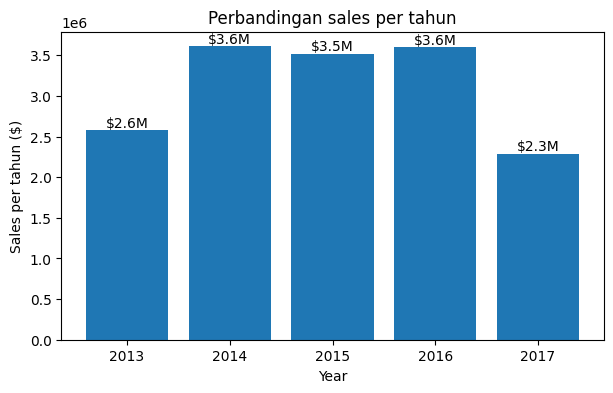

In [ ]:
plt.figure(figsize=(7, 4))
bars = plt.bar(yearly_sales.index, yearly_sales.values)
plt.title('Perbandingan sales per tahun')
plt.xlabel('Year')
plt.ylabel('Sales per tahun ($)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1000000:.1f}M', ha='center', va='bottom')

In [ ]:
# analisa growth per tahun
print("\nGrowth per tahun:")
for i in range(1, len(yearly_sales)):  #misalnya kalau start dari 2014 berarti indeks 2024=0, .index[i] juga bukan untuk dpt nilai datanya, tapi spy dpt label/nama indeks aja
    current_year = yearly_sales.index[i]
    previous_year = yearly_sales.index[i-1]
    growth = ((yearly_sales.iloc[i] - yearly_sales.iloc[i-1]) / yearly_sales.iloc[i-1]) * 100
    print(f"  {current_year}: {growth:+.1f}%")


Growth per tahun:
  2014: +39.9%
  2015: -2.5%
  2016: +2.3%
  2017: -36.4%


Bulanan --- Analisis Kolom 'Sales': Analisa Time-Based

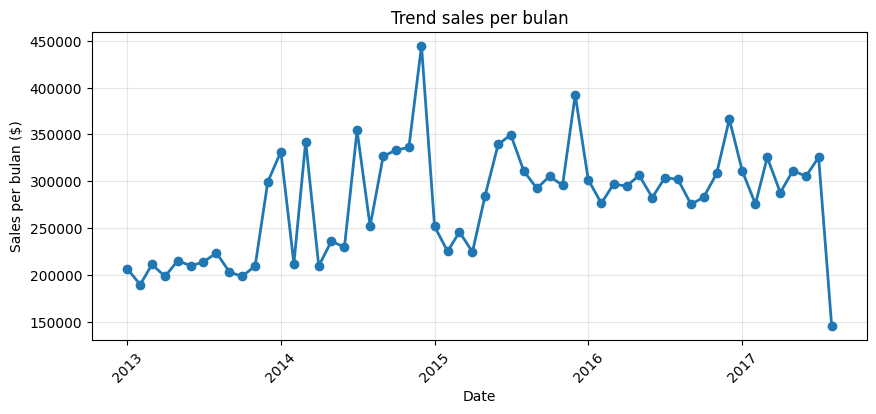

In [ ]:
monthly_dates = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}-01"))
plt.figure(figsize=(10, 4))
plt.plot(monthly_dates, monthly_sales.values, marker='o', linewidth=2)
plt.title("Trend sales per bulan")
plt.xlabel("Date")
plt.ylabel("Sales per bulan ($)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

Harian --- Analisis Kolom 'Sales': Analisa Time-Based

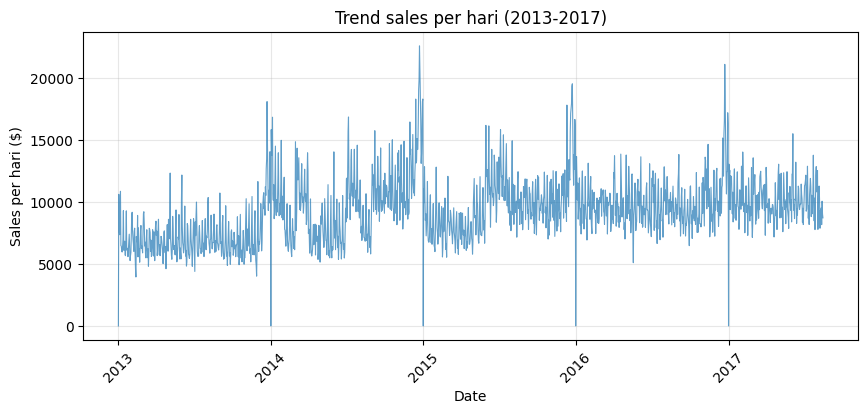

In [ ]:
#trend sales per hari
plt.figure(figsize=(10, 4))
plt.plot(daily_sales.index, daily_sales.values, linewidth=0.8, alpha=0.7)
plt.title("Trend sales per hari (2013-2017)")
plt.xlabel("Date")
plt.ylabel("Sales per hari ($)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

###### #2. Analisis Kolom 'Sales': Analisa Seasonal

In [ ]:
# Analisa pola per bulan
monthly_avg = df_transactions.groupby("month")["sales"].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Rata2 sales harian per bulan:")
for month, avg_sales in monthly_avg.items():
    print(f"  {month_names[month-1]}: ${avg_sales:.0f}")

Rata2 sales harian per bulan:
  Jan: $274
  Feb: $253
  Mar: $278
  Apr: $246
  May: $265
  Jun: $276
  Jul: $303
  Aug: $269
  Sep: $277
  Oct: $274
  Nov: $290
  Dec: $379


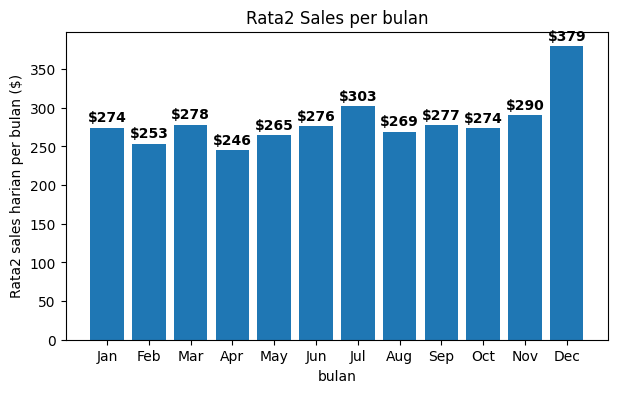

In [ ]:
plt.figure(figsize=(7, 4))
plt.bar(range(1, 13), monthly_avg.values)
plt.title("Rata2 Sales per bulan")
plt.xlabel("bulan")
plt.ylabel("Rata2 sales harian per bulan ($)")
plt.xticks(range(1, 13), [name[:3] for name in month_names])
for i, value in enumerate(monthly_avg.values):
    plt.text(i+1, value + max(monthly_avg.values)*0.01, f'${value:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [ ]:
# Analisa pola harian dalam 1 minggu
dow_avg = df_transactions.groupby('day_of_week')['sales'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print("\nRata2 sales harian dalam 1 minggu:")
for dow, avg_sales in dow_avg.items():
    print(f"  {day_names[dow]}: ${avg_sales:.0f}")


Rata2 sales harian dalam 1 minggu:
  Monday: $284
  Tuesday: $254
  Wednesday: $275
  Thursday: $236
  Friday: $265
  Saturday: $309
  Sunday: $340


In [ ]:
# Analisa perbandingan weekdays dan weekend
weekend_avg = df_transactions[df_transactions["weekend"]]["sales"].mean()
weekday_avg = df_transactions[~df_transactions["weekend"]]["sales"].mean()
print(f"\nRata2 weekend: ${weekend_avg:.0f}")
print(f"\nRata2 weekdays: ${weekday_avg:.0f}")
print(f"Ratio perbandingan Weekend vs Weekday: {weekend_avg/weekday_avg:.2f}")


Rata2 weekend: $325

Rata2 weekdays: $263
Ratio perbandingan Weekend vs Weekday: 1.23


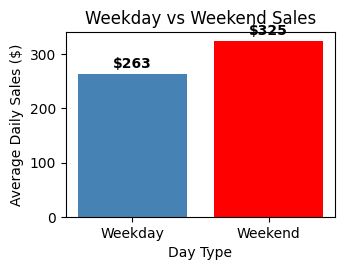

In [ ]:
plt.subplot(2, 2, 4)
plt.bar(["Weekday", "Weekend"], [weekday_avg, weekend_avg], color=["steelblue", "red"])
plt.title("Weekday vs Weekend Sales")
plt.xlabel("Day Type")
plt.ylabel("Average Daily Sales ($)")
values = [weekday_avg, weekend_avg]
for i, value in enumerate(values):
    plt.text(i, value + max(values)*0.02, f'${value:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

###### #3. Analisis Kolom 'family': Analisa Kategori Produk

In [ ]:
category_stats = df_transactions.groupby("family").agg({
    "sales": ["sum", "mean", "count"]
}).round(2)

#ganti ke format yang lebih mudah dibaca (dari sum, mean dan count)jadi total sales, sales rata2 dan number of records
category_stats.columns = ["Total_Sales", "Sales_rata2", "Number_of_Records"]
category_stats = category_stats.sort_values('Total_Sales', ascending=False)

print(f"Jumlah kategori: {len(category_stats)}")
print("\n10 kategori terbanyak dari jumlah sales:")
for i, (category, row) in enumerate(category_stats.head(10).iterrows(), 1):
    print(f"  {i:2d}. {category}: ${row["Total_Sales"]:,.0f}")

print("\n5 kategori terbawah dari jumlah sales:")
for i, (category, row) in enumerate(category_stats.tail(5).iterrows(), 1):
    print(f"  {i:2d}. {category}: ${row['Total_Sales']:,.0f}")

Jumlah kategori: 33

10 kategori terbanyak dari jumlah sales:
   1. GROCERY I: $5,262,682
   2. BEVERAGES: $2,533,831
   3. CLEANING: $1,667,748
   4. PRODUCE: $1,653,582
   5. DAIRY: $871,283
   6. BREAD/BAKERY: $642,855
   7. MEATS: $477,104
   8. PERSONAL CARE: $450,166
   9. POULTRY: $419,630
  10. DELI: $415,271

5 kategori terbawah dari jumlah sales:
   1. HARDWARE: $1,725
   2. HOME APPLIANCES: $926
   3. SCHOOL AND OFFICE SUPPLIES: $813
   4. BOOKS: $230
   5. BABY CARE: $215


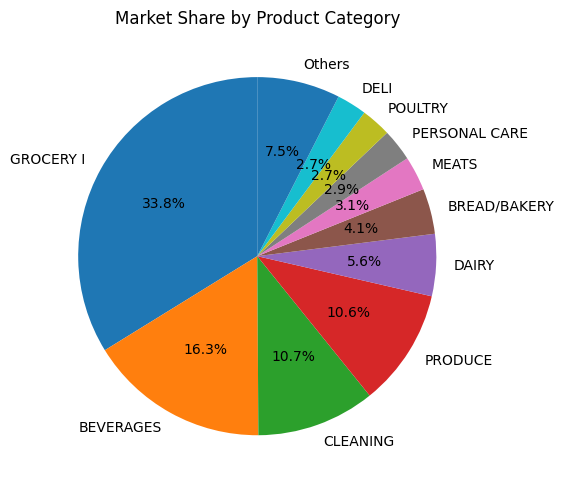

In [ ]:
#data pie chart
total_sales = category_stats["Total_Sales"].sum()
category_stats["Market_Share"] = (category_stats["Total_Sales"] / total_sales * 100).round(1)

# Select the top 10 categories
top_10 = category_stats.head(10)

plt.figure(figsize=(7, 5))
top_10_share = top_10["Market_Share"]
others_share = 100 - top_10_share.sum()

pie_data = list(top_10_share.values) + [others_share]
pie_labels = list(top_10.index) + ["Others"]

plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%", startangle=90)
plt.title("Market Share by Product Category")

plt.tight_layout()
plt.show()

###### #4. Analisis Kolom 'onpromotion'

In [ ]:
# Perbandingan promotion dan no promotion
promo_summary = df_transactions[df_transactions["onpromotion"].isin([0, 1])].groupby("onpromotion")["sales"].agg(["count", "mean", "sum"])
promo_summary.index = ["No Promotion", "On Promotion"]

print("Promotion summary:")
print(promo_summary)

Promotion summary:
              count        mean           sum
No Promotion  42357  137.747578  5.834574e+06
On Promotion   3908  270.049743  1.055354e+06


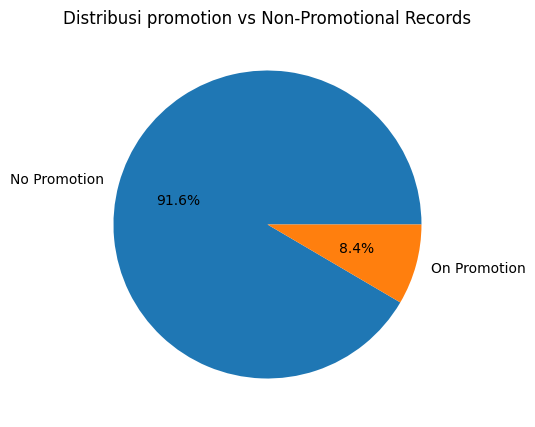

In [ ]:
# Promotion distribution
plt.figure(figsize=(7, 5))
if len(promo_summary) > 1:
    plt.pie([promo_summary.loc["No Promotion", "count"],
             promo_summary.loc["On Promotion", "count"]],
            labels=["No Promotion", "On Promotion"],
            autopct="%1.1f%%")
    plt.title("Distribusi promotion vs Non-Promotional Records")

In [ ]:
# kategori promotion
if len(promo_summary) > 1:
    promo_lift = ((promo_summary.loc["On Promotion", "mean"] /
                   promo_summary.loc["No Promotion", "mean"]) - 1) * 100
    promo_penetration = (promo_summary.loc["On Promotion", "count"] /
                        promo_summary['count'].sum()) * 100

promo_by_category = df_transactions.groupby(["family", "onpromotion"])["sales"].mean().unstack(fill_value=0)
if 1 in promo_by_category.columns and 0 in promo_by_category.columns:
    promo_by_category["promotion_lift"] = ((promo_by_category[1] / promo_by_category[0]) - 1) * 100
    promo_by_category = promo_by_category.sort_values("promotion_lift", ascending=False)
    valid_categories = promo_by_category[(promo_by_category[0] > 0) & (promo_by_category[1] > 0)]


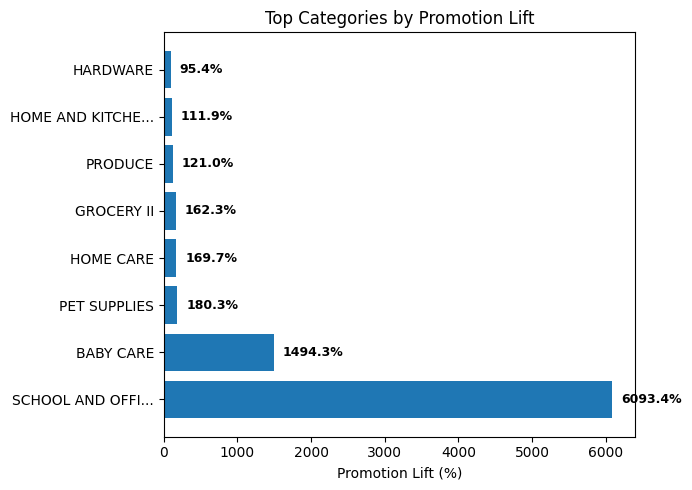

In [ ]:
plt.figure(figsize=(7, 5))
if "promotion_lift" in promo_by_category.columns:
    top_lift_categories = valid_categories.head(8)
    plt.barh(range(len(top_lift_categories)), top_lift_categories['promotion_lift'])
    plt.yticks(range(len(top_lift_categories)),
               [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_lift_categories.index])
    plt.title("Top Categories by Promotion Lift")
    plt.xlabel("Promotion Lift (%)")

    # Tambahkan angka di ujung bar
    for i, value in enumerate(top_lift_categories["promotion_lift"]):
        plt.text(value + max(top_lift_categories["promotion_lift"])*0.02, i,
                 f'{value:.1f}%',
                 ha="left", va="center", fontsize=9, fontweight="bold")
plt.tight_layout()
plt.show()

###### #5. Analisis Kolom 'sales': sales ketika nilainya nol (zero sales)

In [ ]:
print(f"\nTotal sales ${df_transactions["sales"].sum():,.2f}")
print(f"\nZero sales: {(df_transactions['sales'] == 0).sum()} out of {len(df_transactions)} ({(df_transactions['sales'] == 0).mean()*100:.1f}%)")


Total sales $15,592,404.57

Zero sales: 12414 out of 55572 (22.3%)


In [ ]:
print("Analisa Zero Sales")
zero_sales_count = (df_transactions["sales"] == 0).sum()
zero_sales_pct = (zero_sales_count / len(df_transactions)) * 100

print(f"Records dengan zero sales: {zero_sales_count} out of {len(df_transactions)} ({zero_sales_pct:.1f}%)")

# Kapan muncul zero sales?
zero_sales_by_date = df_transactions[df_transactions["sales"] == 0].groupby("date").size()
print(f"Jumlah hari dimana muncul zero sales: {len(zero_sales_by_date)}")

# Apakah zero sales normal atau bermasalah?
zero_by_category = df_transactions[df_transactions["sales"] == 0].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_by_category.head().index
print("\nTop 5 kategori dengan zero sales terbanyak:")
print(zero_by_category.head())

# analisa per tahun
print(f"\nZero sales per tahun:")
print(df_transactions[df_transactions["sales"] == 0].groupby(df_transactions[df_transactions["sales"] == 0].index.year).size())

for category in top_5_categories:
    zero_sales = df_transactions[(df_transactions["sales"] == 0) &
                                  (df_transactions["family"] == category)]

    # Tahun dengan zero sales terbanyak
    top_year = zero_sales.groupby(zero_sales.index.year).size().idxmax()
    top_year_count = zero_sales.groupby(zero_sales.index.year).size().max()

    # Hari dengan zero sales terbanyak
    day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sunday"]
    top_day = zero_sales.groupby(zero_sales.index.dayofweek).size().idxmax()
    top_day_count = zero_sales.groupby(zero_sales.index.dayofweek).size().max()

    # Tanggal spesifik dengan zero sales terbanyak
    worst_date = zero_sales.groupby("date").size().idxmax()
    worst_date_count = zero_sales.groupby("date").size().max()

    print(f"\n{category}:")
    print(f"  • Total zero sales: {len(zero_sales)}")
    print(f"  • Worst year: {top_year} ({top_year_count} occurrences)")
    print(f"  • Worst day: {day_names[top_day]} ({top_day_count} occurrences)")
    print(f"  • Worst single date: {worst_date.strftime("%Y-%m-%d")} ({worst_date_count} zero sales)")

Analisa Zero Sales
Records dengan zero sales: 12414 out of 55572 (22.3%)
Jumlah hari dimana muncul zero sales: 1684

Top 5 kategori dengan zero sales terbanyak:
family
BABY CARE                     1562
BOOKS                         1556
SCHOOL AND OFFICE SUPPLIES    1414
HOME APPLIANCES               1061
PET SUPPLIES                   766
dtype: int64

Zero sales per tahun:
date
2013    4731
2014    2879
2015    2531
2016    1566
2017     707
dtype: int64

BABY CARE:
  • Total zero sales: 1562
  • Worst year: 2013 (364 occurrences)
  • Worst day: Tue (228 occurrences)
  • Worst single date: 2013-01-01 (1 zero sales)

BOOKS:
  • Total zero sales: 1556
  • Worst year: 2013 (364 occurrences)
  • Worst day: Tue (225 occurrences)
  • Worst single date: 2013-01-01 (1 zero sales)

SCHOOL AND OFFICE SUPPLIES:
  • Total zero sales: 1414
  • Worst year: 2013 (364 occurrences)
  • Worst day: Thu (211 occurrences)
  • Worst single date: 2013-01-01 (1 zero sales)

HOME APPLIANCES:
  • Total zero 

###### #6. Analisis Kolom 'dcoilwtico': analisa harga bahan bakar

In [ ]:
print("\nAnalisa Missing values:")
missing_values = df_transactions.isnull().sum()
missing_percentage = (missing_values / len(df_transactions)) * 100

missing_df_transactions = pd.DataFrame({
    "Missing_Count": missing_values,
    "Missing_Percentage": missing_percentage
})
print(missing_df_transactions)

# analisa missing value oil price
if df_transactions["dcoilwtico"].isnull().sum() > 0:
    print(f"\nAnalisa Oil price missing values :")
    print(f"Total missing: {df_transactions["dcoilwtico"].isnull().sum()} out of {len(df_transactions)}")
    print(f"Percentage: {(df_transactions["dcoilwtico"].isnull().sum() / len(df_transactions)) * 100:.2f}%")

    # Kapan oil price missing?
    missing_dates = df_transactions[df_transactions['dcoilwtico'].isnull()].index.unique()
    print(f"Jumlah hari missing oil price: {len(missing_dates)}")
    print(f"Tanggal pertama missing oil price: {missing_dates.min()}")
    print(f"Tanggal terakhir missing oil price: {missing_dates.max()}")

    # apakah ada pattern? (misal weekends?)
    df_transactions["day_of_week"] = df_transactions.index.dayofweek
    missing_by_dow = df_transactions[df_transactions["dcoilwtico"].isnull()]["day_of_week"].value_counts().sort_index()
    print("\nMissing oil prices berdasarkan hari dalam seminggu:")
    day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    for dow, count in missing_by_dow.items():
        print(f"  {day_names[dow]}: {count} missing")


Analisa Missing values:
             Missing_Count  Missing_Percentage
id                       0            0.000000
store_nbr                0            0.000000
family                   0            0.000000
sales                    0            0.000000
onpromotion              0            0.000000
dcoilwtico           17193           30.938242
year                     0            0.000000
month                    0            0.000000
day_of_week              0            0.000000
weekend                  0            0.000000

Analisa Oil price missing values :
Total missing: 17193 out of 55572
Percentage: 30.94%
Jumlah hari missing oil price: 521
Tanggal pertama missing oil price: 2013-01-01 00:00:00
Tanggal terakhir missing oil price: 2017-08-13 00:00:00

Missing oil prices berdasarkan hari dalam seminggu:
  Monday: 759 missing
  Tuesday: 66 missing
  Wednesday: 33 missing
  Thursday: 198 missing
  Friday: 264 missing
  Saturday: 7953 missing
  Sunday: 7920 missing


###### #7. Analisis Kolom 'Sales': Kategori 'GROCERY I' - Plot Time Series

- untuk lihat visual pola data
- deteksi trend (naik/turun jangka panjang)
- deteksi season (repeated pattern sales)
- spot outliers (misal hari raya etc)

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#Setting untuk plot lebih bagus
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (15, 6)

#Load RAW data
df_transactions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT 1/store.csv")

#basic cleaning
df_transactions["date"] = pd.to_datetime(df_transactions["date"])
df_transactions = df_transactions.sort_values("date")
missing_count = df_transactions["dcoilwtico"].isnull().sum()

if missing_count > 0:
    df_transactions["dcoilwtico"].fillna(method="ffill", inplace=True)
    print(f"Isi {missing_count} missing values")

df_transactions = df_transactions.set_index("date")

print(f"Date range: {df_transactions.index.min()} to {df_transactions.index.max()}")

Isi 17193 missing values
Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


In [ ]:
#Pilih 1 kategori untuk EDA
family_sales = df_transactions.groupby("family")["sales"].sum().sort_values(ascending=False)
print("\nTop 10 katerogri dari total sales:")
print(family_sales.head(10))

# Pilih GROCERY I (biasanya yang tertinggi di retail)
selected_family = "GROCERY I"  # Ganti sesuai keinginan

# Filter data untuk family terpilih
df_family = df_transactions[df_transactions["family"] == selected_family].copy()

print(f"Records: {len(df_family)}")
print(f"Date range: {df_family.index.min()} to {df_family.index.max()}")
print(f"Average daily sales: {df_family["sales"].mean():.2f}")
print(f"Max daily sales: {df_family["sales"].max():.2f}")
print(f"Min daily sales: {df_family["sales"].min():.2f}")



Top 10 katerogri dari total sales:
family
GROCERY I        5.262682e+06
BEVERAGES        2.533831e+06
CLEANING         1.667748e+06
PRODUCE          1.653582e+06
DAIRY            8.712830e+05
BREAD/BAKERY     6.428546e+05
MEATS            4.771044e+05
PERSONAL CARE    4.501660e+05
POULTRY          4.196304e+05
DELI             4.152710e+05
Name: sales, dtype: float64
Records: 1684
Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Average daily sales: 3125.11
Max daily sales: 7656.00
Min daily sales: 0.00


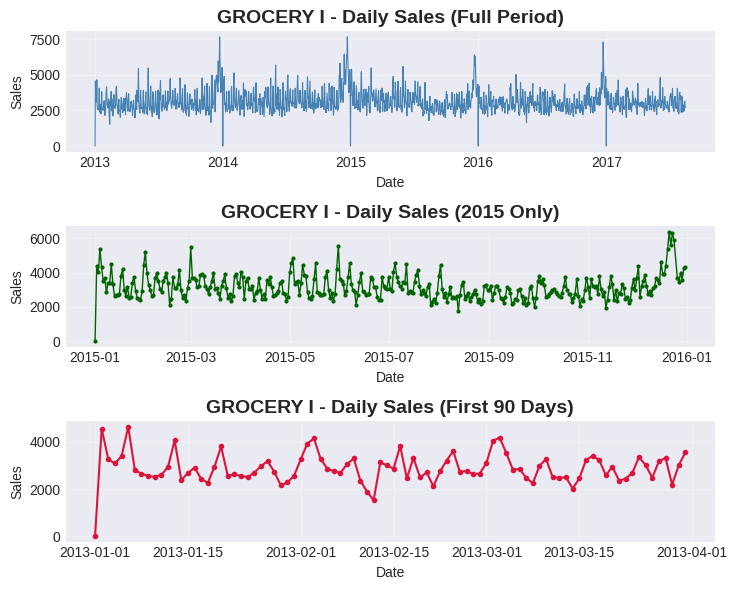

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(7.5, 6))

# Plot 1a: Full time series
axes[0].plot(df_family.index, df_family["sales"], linewidth=0.8, color="steelblue")
axes[0].set_title(f"{selected_family} - Daily Sales (Full Period)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Sales")
axes[0].grid(True, alpha=0.3)

# Plot 1b: Zoom ke 1 tahun - pakai tahun yang ada datanya
zoom_year = 2015
df_zoom = df_family[df_family.index.year == zoom_year]

if len(df_zoom) > 0:
    axes[1].plot(df_zoom.index, df_zoom["sales"], linewidth=1, color="darkgreen", marker="o", markersize=2)
    axes[1].set_title(f"{selected_family} - Daily Sales ({zoom_year} Only)", fontsize=14, fontweight="bold")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Sales")
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, f"No data for {zoom_year}", ha="center", va="center", fontsize=14, transform=axes[1].transAxes)

# Plot 1c: Zoom 3 bulan - ambil 90 hari pertama
df_3months = df_family.iloc[:90]

axes[2].plot(df_3months.index, df_3months["sales"], linewidth=1.5, color="crimson", marker="o", markersize=3)
axes[2].set_title(f"{selected_family} - Daily Sales (First 90 Days)", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Sales")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
###### #7. Analisis Kolom 'Sales': Kategori 'Groceries' - Plot Time Series

###### #8. Analisis Kolom 'Sales': Kategori 'GROCERY I' - Trend & Seasonality

###### #8.a Moving Average (MA)

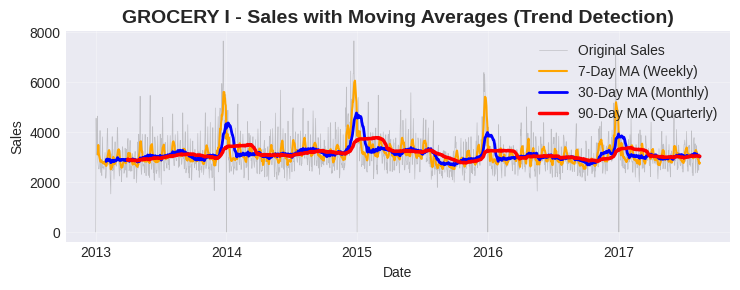

In [ ]:
# MOVING AVERAGE - Smoothing untuk lihat trend
# Hitung moving average dengan berbagai window
df_family["MA_7"] = df_family["sales"].rolling(window=7).mean()    # Weekly MA
df_family["MA_30"] = df_family["sales"].rolling(window=30).mean()  # Monthly MA
df_family["MA_90"] = df_family["sales"].rolling(window=90).mean()  # Quarterly MA

# Plot
plt.figure(figsize=(7.5, 3))
plt.plot(df_family.index, df_family["sales"], label="Original Sales", linewidth=0.5, alpha=0.4, color="gray")
plt.plot(df_family.index, df_family["MA_7"], label="7-Day MA (Weekly)", linewidth=1.5, color="orange")
plt.plot(df_family.index, df_family["MA_30"], label="30-Day MA (Monthly)", linewidth=2, color="blue")
plt.plot(df_family.index, df_family["MA_90"], label="90-Day MA (Quarterly)", linewidth=2.5, color="red")

plt.title(f"{selected_family} - Sales with Moving Averages (Trend Detection)", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Analisa Moving Average
- Garis MA yang smooth menunjukkan TREND jangka panjang
- Kalau MA naik terus = upward trend
- Kalau MA turun terus = downward trend
- Kalau MA relatif flat = no strong trend, relatively stationary


###### #8.b Seasonal Decomposition

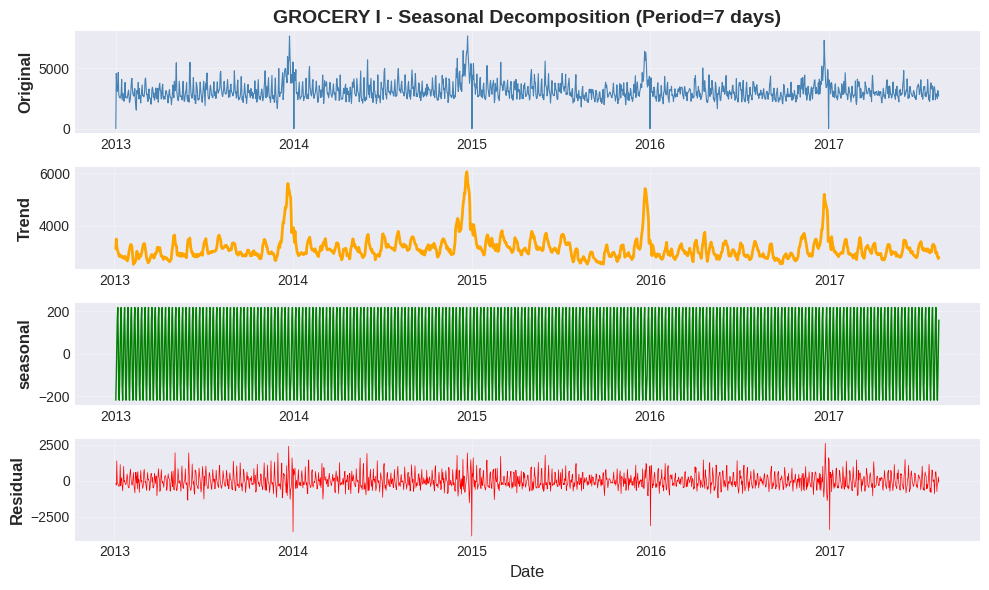

In [ ]:
decomposition = seasonal_decompose(df_family["sales"], model="additive", period=7)

# Plot components
fig, axes = plt.subplots(4, 1, figsize=(10, 6))

# 1. Original
axes[0].plot(df_family.index, df_family["sales"], color="steelblue", linewidth=0.8)
axes[0].set_ylabel("Original", fontsize=12, fontweight="bold")
axes[0].set_title(f"{selected_family} - Seasonal Decomposition (Period=7 days)", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# 2. Trend
axes[1].plot(decomposition.trend.index, decomposition.trend, color="orange", linewidth=2)
axes[1].set_ylabel("Trend", fontsize=12, fontweight="bold")
axes[1].grid(True, alpha=0.3)

# 3. Seasonal
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color="green", linewidth=1)
axes[2].set_ylabel("seasonal", fontsize=12, fontweight="bold")
axes[2].grid(True, alpha=0.3)

# 4. Residual
axes[3].plot(decomposition.resid.index, decomposition.resid, color="red", linewidth=0.5)
axes[3].set_ylabel("Residual", fontsize=12, fontweight="bold")
axes[3].set_xlabel("Date", fontsize=12)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Analisa
   1. TREND (Orange):
      - Menunjukkan arah jangka panjang (naik/turun/flat)
      - Kalau naik = sales meningkat dari waktu ke waktu
      - Kalau flat = sales relatif stabil

   2. SEASONAL (Green):
      - Pola yang berulang secara teratur (weekly pattern)
      - Kalau terlihat jelas = ada weekly seasonality yang kuat! ✅
      - Kalau hampir flat = seasonal effect lemah

   3. RESIDUAL (Red):
      - Noise/random variation yang tidak bisa dijelaskan
      - Idealnya acak, tidak ada pola tertentu

###### #8.c Box Plot Weekly

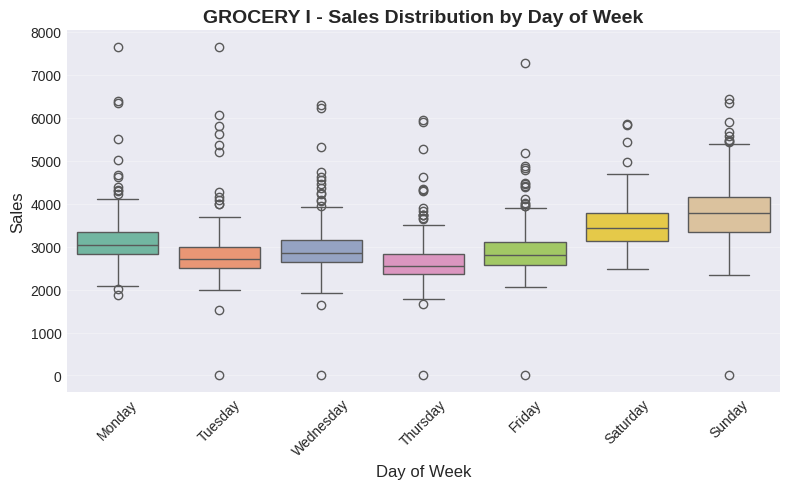


Average Sales by Day of Week:
Monday      :  3166.80
Tuesday     :  2838.49
Wednesday   :  2953.65
Thursday    :  2669.73
Friday      :  2922.56
Saturday    :  3495.77
Sunday      :  3829.42


In [ ]:
# Tambahkan kolom day of week
df_family["day_of_week"] = df_family.index.dayofweek
df_family["day_name"] = df_family.index.day_name()

# Box plot
plt.figure(figsize=(8, 5))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.boxplot(data=df_family, x="day_name", y="sales", order=day_order, palette="Set2")
plt.title(f"{selected_family} - Sales Distribution by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

# Hitung average sales per day
avg_by_day = df_family.groupby("day_name")["sales"].mean().reindex(day_order)

print("\nAverage Sales by Day of Week:")
for day, avg in avg_by_day.items():
    print(f"{day:12s}: {avg:8.2f}")

###### #8.d Box Plot Monthly

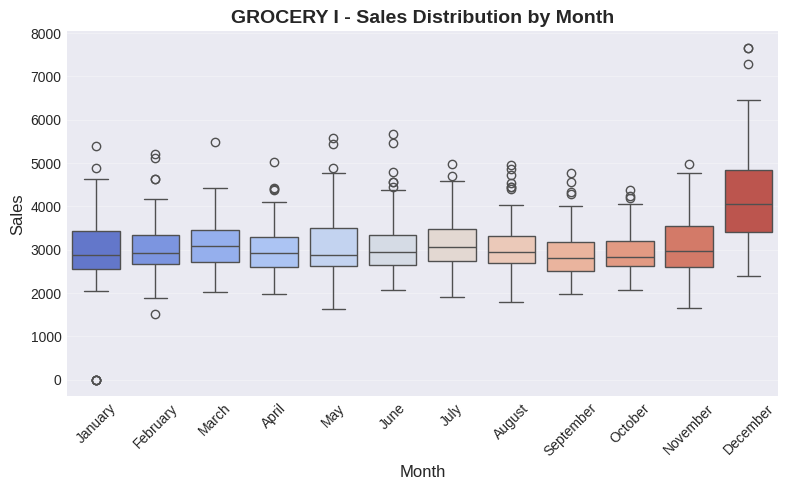


Average Sales by Month:
January     :  2980.53
February    :  3044.35
March       :  3107.70
April       :  2981.37
May         :  3094.70
June        :  3061.77
July        :  3134.45
August      :  3059.71
September   :  2892.53
October     :  2933.23
November    :  3098.16
December    :  4248.88


In [ ]:
# Tambahkan kolom month
df_family["month"] = df_family.index.month
df_family["month_name"] = df_family.index.month_name()

# Box plot
plt.figure(figsize=(8, 5))
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
sns.boxplot(data=df_family, x="month_name", y="sales", order=month_order, palette="coolwarm")
plt.title(f"{selected_family} - Sales Distribution by Month", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

# Hitung average sales per month
avg_by_month = df_family.groupby("month_name")["sales"].mean().reindex(month_order)

print("\nAverage Sales by Month:")
for month, avg in avg_by_month.items():
    print(f"{month:12s}: {avg:8.2f}")


##### #B. Multivariare Analysis (Analisis Hubungan Antar Kolom)

###### #1. Analisis Kolom 'sales' vs 'dcoilwtico': Analisa Hubungan 'Sales' terhadap 'Harga Minyak/Bahan Bakar'

In [ ]:
print("Oil price statistics:")
print(df_transactions['dcoilwtico'].describe())

Oil price statistics:
count    55539.000000
mean        67.909917
std         25.669621
min         26.190000
25%         46.370000
50%         53.410000
75%         95.720000
max        110.620000
Name: dcoilwtico, dtype: float64



Korelasi daily sales dan oil price: -0.350


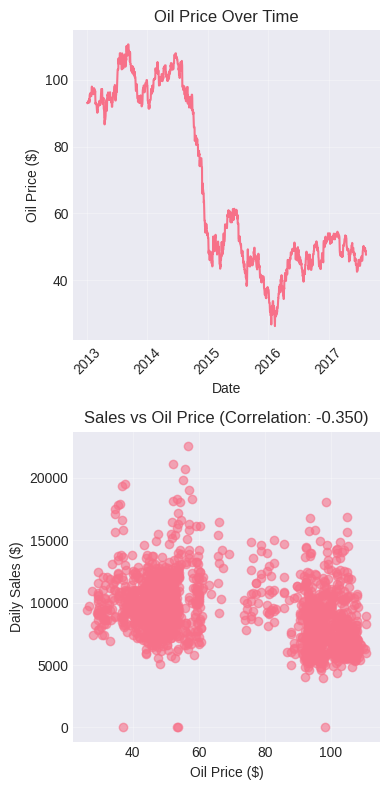

In [ ]:
#korelasi groceries biasa dengan oil price
daily_data = df_transactions.groupby("date").agg({
    "sales": "sum",
    "dcoilwtico": "mean"
}).reset_index()

#kalkulasi korelasi
correlation = daily_data["sales"].corr(daily_data["dcoilwtico"])
print(f"\nKorelasi daily sales dan oil price: {correlation:.3f}")

# Membuat figure dan axes untuk 2 plot (2 baris, 1 kolom)
fig, ax = plt.subplots(2, 1, figsize=(4, 8)) # figsize=(lebar, tinggi)

# Plot 1: Oil price over time (di baris pertama, ax[0])
ax[0].plot(daily_data["date"], daily_data["dcoilwtico"])
ax[0].set_title("Oil Price Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Oil Price ($)")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, alpha=0.3)

# Plot 2: Scatter plot (di baris kedua, ax[1])
ax[1].scatter(daily_data["dcoilwtico"], daily_data["sales"], alpha=0.6)
ax[1].set_title(f"Sales vs Oil Price (Correlation: {correlation:.3f})")
ax[1].set_xlabel("Oil Price ($)")
ax[1].set_ylabel("Daily Sales ($)")
ax[1].grid(True, alpha=0.3)

# Merapikan layout agar judul dan label tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

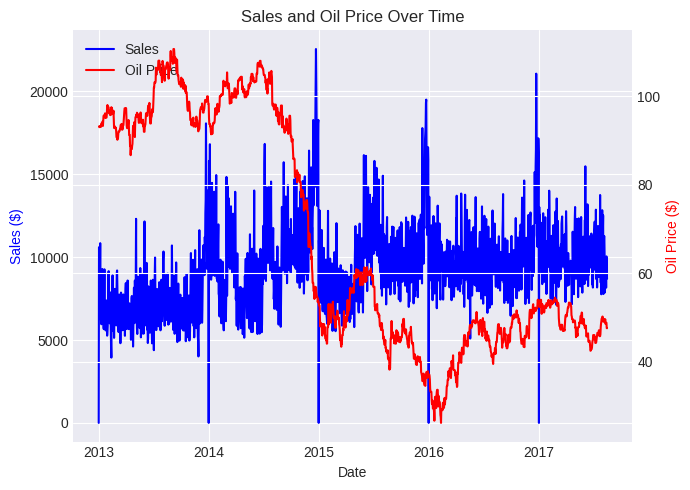

In [ ]:
#korelasi oil price dan sales
plt.figure(figsize=(7, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(daily_data["date"], daily_data["sales"], "b-", label="Sales")
line2 = ax2.plot(daily_data["date"], daily_data["dcoilwtico"], "r-", label="Oil Price")

ax1.set_xlabel("Date")
ax1.set_ylabel("Sales ($)", color="b")
ax2.set_ylabel("Oil Price ($)", color="r")
ax1.set_title("Sales and Oil Price Over Time")
plt.xticks(rotation=45)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

plt.tight_layout()
plt.show()

###### #2. Analisis Kolom 'sales' vs 'onpromotion': Analisa Hubungan 'Sales' terhadap 'Promosi'


Matriks Korelasi antara Sales dan Promosi:
                 sales  onpromotion
sales        1.000000     0.448904
onpromotion  0.448904     1.000000


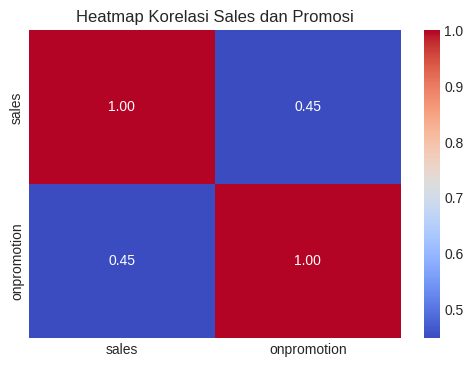


Heatmap korelasi antara Sales dan Promosi telah ditampilkan di atas.


In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df_transactions[["sales", "onpromotion"]].corr()
print("\nMatriks Korelasi antara Sales dan Promosi:\n", correlation_matrix)

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Sales dan Promosi")
plt.show()

print("\nHeatmap korelasi antara Sales dan Promosi telah ditampilkan di atas.")

##### #C. Analisis Kualitas Data

###### #1. Mengecek Data Hilang (Missing Values)

In [ ]:
print("\nMissing values per column:")
missing_values = df_transactions.isnull().sum()
missing_percentage = (missing_values / len(df_transactions)) * 100
for col in df_transactions.columns:
    if missing_values[col] > 0:
        print(f"{col}: {missing_values[col]} missing ({missing_percentage[col]:.1f}%)")
    else:
        print(f"{col}: No missing values")


Missing values per column:
id: No missing values
store_nbr: No missing values
family: No missing values
sales: No missing values
onpromotion: No missing values
dcoilwtico: 33 missing (0.1%)


###### #2. Mengecek Data Duplikat (Duplicates)

-----------------------------------

###### #3. Mengecek Pencilan (Outliers)

In [ ]:
#Cek outliers per kategori pakai IQR (interquartile range), IQR=Q3-Q1

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers, lower_bound, upper_bound

# Detect outliers in sales
outliers, lower, upper = detect_outliers_iqr(df_transactions, "sales")
n_outliers = outliers.sum()

print(f"Outliers detected: {n_outliers} ({n_outliers/len(df_transactions)*100:.2f}%)")
print(f"Normal range: ${lower:.2f} to ${upper:.2f}")

df_transactions["is_outlier"] = outliers.astype(int)

print("\nNotes: pertahankan outlier, kemungkinan naiknya sales: holiday, special events")

Outliers detected: 6551 (11.79%)
Normal range: $-353.00 to $591.00

Notes: pertahankan outlier, kemungkinan naiknya sales: holiday, special events


#### #2.1.2.3 Kesimpulan

In [ ]:
print("\nDataset Overview:")
print(f"- Time period: {df_transactions.index.min().strftime("%Y-%m-%d")} to {df_transactions.index.max().strftime("%Y-%m-%d")}")
print(f"- Total durasi : {(df_transactions.index.max() - df_transactions.index.min()).days/365:.1f} years")
print(f"- Total records : {len(df_transactions):,}")
print(f"- Kategori produk : {df_transactions["family"].nunique()}")
print(f"- Total revenue: ${df_transactions["sales"].sum():,.0f}")


Dataset Overview:
- Time period: 2013-01-01 to 2017-08-15
- Total durasi : 4.6 years
- Total records : 55,572
- Kategori produk : 33
- Total revenue: $15,592,405


In [ ]:
best_category = category_stats.index[0]
best_day = day_names[dow_avg.idxmax()]
best_month = month_names[monthly_avg.idxmax() - 1]

print(f"- Kategori terbaik : {best_category}")
print(f"- Hari sales terbaik : {best_day}")
print(f"- Bulan sales terbaik : {best_month}")
print(f"- Weekend sales {weekend_avg/weekday_avg:.1f}x weekday sales")

- Kategori terbaik : GROCERY I
- Hari sales terbaik : Sunday
- Bulan sales terbaik : Dec
- Weekend sales 1.2x weekday sales


### #2.1.3 Data Preprocessing

#### #2.1.3.1 Missing Values

##### #A. Handling Missing Values

In [ ]:
print("\nBefore handling missing values:")
print(df_transactions.isnull().sum())


Before handling missing values:
id              0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico     33
is_outlier      0
dtype: int64


In [ ]:
#handle missing oil price
#strateginya adalah dengan forward fill pakai harga terakhir yang ada
#alasannya adalah oil market tutup di weekend, maka harga tidak akan berubah
print(f"\nMissing oil price sebelumnya: {df_transactions["dcoilwtico"].isnull().sum()}")

df_transactions["dcoilwtico"] = df_transactions["dcoilwtico"].ffill()
df_transactions["dcoilwtico"] = df_transactions["dcoilwtico"].bfill()

print(f"Missing oil prices setelahnya: {df_transactions["dcoilwtico"].isnull().sum()}")


Missing oil price sebelumnya: 33
Missing oil prices setelahnya: 0


In [ ]:
#untuk isi data hilang ada beberapa cara lain:
#1. isi dengan mean
#df_transactions["dcoilwtico"].fillna(df_transactions["dcoilwtico"].mean())
#2. isi dengan median
#df_transcations["dcoiltwico"].fillna(df_transactions["dcoilwtico"].median())
#3. isi dengan nilai tertentu
#df_transactions["dcoilwtico"].fillna(0)
#4. interpolasi linear
#df_transcations["dcoilwtico"].interpolate(method="linear")
#5. buang baris yang ada NaNnya
#df_transactions.dropna(subset=["dcoilwtico"])
#untuk isi oil price, ffil()+bfill() yang paling masuk akal

###### #1. Penanganan Penjualan Nol (Zero Sales) pada Kolom 'Sales'

In [ ]:
print(f"\nZero sales records: {zero_sales_count} ({zero_sales_pct:.1f}%)")

# Kapan muncul zero sales?
zero_sales_by_date = df_transactions[df_transactions["sales"] == 0].groupby("date").size()
all_zero_sales_dates = zero_sales_by_date[zero_sales_by_date == df_transactions["family"].nunique()]
print(f"Jumlah hari dimana muncul zero sales: {len(zero_sales_by_date)}")
if len(all_zero_sales_dates) > 0:
    print("contoh tanggal dengan all zero sales:")
    print(all_zero_sales_dates.head())


Zero sales records: 12414 (22.3%)
Jumlah hari dimana muncul zero sales: 1684
contoh tanggal dengan all zero sales:
date
2013-01-01    33
2014-01-01    33
2015-01-01    33
2016-01-01    33
2017-01-01    33
dtype: int64


#### #2.1.3.2 Duplicates

##### #A. Handling Duplicates

#### #2.1.3.3 Handling Outliers

##### #A. Handling Outliers

### #2.1.3.3 Feature Engineering/New Features

##### #1. Mengurutkan Kolom 'date' Dari Tanggal Terlama ke Terbaru


In [ ]:
import pandas as pd

# Baca data
df_transactions = pd.read_csv("/content/sample_data/store5.csv")

# cek kolom "date" udah dalam format datetime
df_transactions["date"] = pd.to_datetime(df_transactions["date"])

# urut dari transaksi lama ke baru)
df_transactions = df_transactions.sort_values("date", ascending=True)

# Reset index setelah sorting (optional tapi recommended)
df = df_transactions.reset_index(drop=True)

print("Data setelah di-sort:")
print(df)

# Cek 10 tanggal pertama
print(df["date"].head(10))

# Cek apa ada yang tidak urut
is_sorted = df["date"].is_monotonic_increasing
print(f"Apakah data sudah urut? {is_sorted}")  #--> kalau sudah urut jawabannya true

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/store5.csv'

##### #2. Feature Baru: Memecah Kolom 'date' menjadi kolom 'year', 'month', 'day' (Untuk Model ML Tradisional)

In [ ]:
# df_transactions["year"] = df_transactions["date"].dt.year
# df_transactions["month"] = df_transactions["date"].dt.month
# df_transactions["day"] = df_transactions["date"].dt.day
# df_transactions["day_of_week"] = df_transactions["date"].dt.dayofweek  # 0=Monday, 6=Sunday
# df_transactions["day_of_year"] = df_transactions["date"].dt.dayofyear
# df_transactions["week_of_year"] = df_transactions["date"].dt.isocalendar().week

# # Binary features
# df_transactions["weekend"] = df_transactions["day_of_week"].isin([5, 6]).astype(int)
# df_transactions["awal bulan"] = df_transactions["date"].dt.is_month_start.astype(int)
# df_transactions["akhir bulan"] = df_transactions["date"].dt.is_month_end.astype(int)

# print("Temporary time features:")
# temporal_features = ["year", "month", "day", "day_of_week", "day_of_year",
#                     "week_of_year", "weekend", "awal_bulan",
#                     "akhir_bulan"]
# for feature in temporal_features:
#     print(f"  - {feature}")

##### #3. Feature Baru: Kolom 'Sales Lag' dengan rentang periode 1, 7, 14, 21, 28 (Untuk Model ML tradisional)

kenapa pakai mingguan dan bukan bulanan? karena sales di akhir bulan biasanya lebih tinggi dari sales diawal bulan sehingga keakuratan data bisa hilang kalau pakai bulanan

In [ ]:
# print("Note: Lag Features per kategori")

# # pakai family untuk mengelompokkan barang yang sama jadi 1
# df_transactions = df_transactions.sort_values(["family", "date"]).reset_index(drop=True)

# # buat lag features untuk mingguan
# lag_periods = [1, 7, 14, 21, 28]

# for lag in lag_periods:
#     df_transactions[f"sales_lag_{lag}"] = df_transactions.groupby("family")["sales"].shift(lag)
#     print(f"  - sales_lag_{lag}: Sales from {lag} days ago")

##### #4. Menyimpan Data Bersih

In [ ]:
# SAVE data yang sudah clean
#df.to_csv("store5_clean.csv")  # Save dengan index
# Atau
df_transactions.to_pickle("store5_clean.pkl")  # Lebih baik, preserve datetime index


##### #4.a Load Data Bersih

In [ ]:
df = pd.read_pickle("store5_clean.pkl")  # Hasil dari Data Collecting

# Convert 'date' column to datetime and set as index
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

print(f"Total records: {len(df)}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

In [ ]:
df

##### #4.b Filter Grocery I

In [ ]:
selected_family = "GROCERY I"  # Berdasarkan EDA insights
df_family = df[df["family"] == selected_family].copy()

print(f"Selected family: {selected_family}")
print(f"Records: {len(df_family)}")

In [ ]:
df_family

##### #4.c Menentukan Exogenus Variable: Kolom 'onpromotion', 'dcoilwtico', dan menambah 'is_holiday_season'

In [ ]:
exog_cols = ["onpromotion", "dcoilwtico"]

# Set the 'date' column as the index if it's not already
if not isinstance(df_family.index, pd.DatetimeIndex):
    df_family = df_family.set_index("date")

#Coba tambahin holiday season dummy
df_family["is_holiday_season"] = df_family.index.month.isin([11, 12]).astype(int)

#update exog_cols
exog_cols.append('is_holiday_season')

print(f"Exogenous variables: {exog_cols}")

In [ ]:
df_family

##### #4.Split

In [ ]:
# Import pandas jika belum
import pandas as pd

# Asumsikan df_family, exog_cols, dll. sudah didefinisikan sebelumnya
# Split berdasarkan waktu (80/20)
train_size = int(len(df_family) * 0.8)
train = df_family.iloc[:train_size]
test = df_family.iloc[train_size:]

# Pisahkan target dan fitur exogenous
y_train = train['sales']
X_train = train[exog_cols]
y_test = test['sales']
X_test = test[exog_cols]

# --- Mengubah y_train dan y_test menjadi DataFrame ---
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

# Verifikasi tipe datanya
print("Tipe data y_train_df:", type(y_train_df))
print("Tipe data y_test_df:", type(y_test_df))

# Tampilkan beberapa baris pertama dari DataFrame baru
print("\nHead of y_train_df:")
print(y_train_df.head())

print("\nHead of y_test_df:")
print(y_test_df.head())

In [ ]:
y_test

## #2.2 Modeling

### #2.2.1 Model Training

#### #1. LSTM

##### #a. LSTM: Memuat Data Time Series

In [ ]:
# Memuat data time series
df_family = pd.read_pickle('/content/store5_clean.pkl')
# Melihat beberapa baris pertama
print(df_family.head())

# Memeriksa informasi dataset
print(df_family.info())

# Memeriksa statistik deskriptif
print(df_family.describe())

from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalisasi data
df_family['sales'] = scaler.fit_transform(df_family[['sales']])
# Membuat fitur lag
df_family['lag_1'] = df_family['sales'].shift(1)

# Menghapus missing values akibat shift
df_family.dropna(inplace=True)
# Tentukan ukuran data training
train_size = int(len(df_family) * 0.8)

# Membagi data
train, test = df_family[:train_size], df_family[train_size:]
import numpy as np

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train = create_sequences(train['sales'].values, seq_length)
X_test, y_test = create_sequences(test['sales'].values, seq_length)
# Reshape data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# isi codingan disini
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Inisialisasi model
model = Sequential()

# Menambahkan layer LSTM pertama
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Menambahkan layer LSTM kedua
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Menambahkan layer LSTM ketiga
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Menambahkan layer output
model.add(Dense(units=1))

##### #b. LSTM: Mengkompilasi Model

In [ ]:
# Mengompilasi model LSTM
model.compile(optimizer='adam', loss='mean_squared_error')

##### #c. LSTM: Melatih Model

In [ ]:
# Melatih model


model.fit(X_train, y_train, epochs=100, batch_size=32)

#### #2. SARIMAX

##### #a. Visualisasi Data

In [ ]:
# Filter data for 'GROCERY I'
df_grocery_i = df[df["family"] == "GROCERY I"].copy()

# Plot time series data for 'GROCERY I' sales
plt.figure(figsize=(7.5, 5))
plt.plot(df_grocery_i.index, df_grocery_i["sales"])
plt.title("Daily Sales for GROCERY I")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### #b. Identifikasi Model: Mencari Order p, d, q

###### #b.1 Menentukan Differencing (d) dengan Cek Stasioneritas

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Fungsi untuk cek stasioneritas
def check_stationarity(timeseries, title=""):
    print(f"\n ADF Test Results for {title}")

    # Perform ADF test
    result = adfuller(timeseries.dropna(), autolag= "AIC")

    # Extract results
    adf_statistic = result[0]
    p_value = result[1]
    n_lags = result[2]
    n_obs = result[3]

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f'Number of Lags Used  : {n_lags}')
    print(f'Number of Obs        : {n_obs}')


    for key, value in result[4].items():
        print(f"  {key}: {value:.2f}")

    # Hasil tes
    if p_value <= 0.05:
        print(" STASIONER (p-value < 0.05)")
        print(" Data siap digunakan untuk SARIMAX")
    else:
        print(" TIDAK STASIONER (p-value >= 0.05)")
        print(" Butuh differencing untuk membuat data stasioner")

    return result[1]  # return p-value

# Perform ADF test on the 'GROCERY I' sales data
# Assuming df_grocery_i is already created and has a DatetimeIndex
if 'df_grocery_i' in locals() and isinstance(df_grocery_i, pd.DataFrame) and 'sales' in df_grocery_i.columns:
    p_value_original = check_stationarity(df_grocery_i["sales"], "GROCERY I - original sales")
else:
    print("Error: df_grocery_i DataFrame not found or does not contain 'sales' column.")

###### #b.2 Menentukan Autoregressive (p) dan Moving Average (q)

In [ ]:
# Plot ACF and PACF to determine p and q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(7.5, 5))

# ACF Plot
plot_acf(df_grocery_i["sales"].dropna(), lags=30, ax=axes[0]) # Using 30 lags as an example
axes[0].set_title("Autocorrelation Function (ACF) for GROCERY I Sales", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Lags (days)", fontsize=12)
axes[0].set_ylabel("ACF", fontsize=12)
axes[0].grid(True, alpha=0.3)

# PACF Plot
plot_pacf(df_grocery_i["sales"].dropna(), lags=30, ax=axes[1]) # Using 30 lags as an example
axes[1].set_title("Partial Autocorrelation Function (PACF) for GROCERY I Sales", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Lags (days)", fontsize=12)
axes[1].set_ylabel("PACF", fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###### #b.3 Orde yang Digunakan

Berdasarkan analisis data 'GROCERY I' dan plot yang sudah dihasilkan:

*   **Differencing (d):** Dari hasil ADF Test di cell `XZ58D88iUiwi`, p-value < 0.05, menunjukkan data **stasioner**. Jadi, order non-musiman **d = 0**.
*   **Order Non-musiman (p, q):** Dari plot ACF dan PACF di cell `9816e273`, terlihat spike signifikan di lag 1 sebelum drop off. Ini mengindikasikan order non-musiman **p = 1** dan **q = 1** sebagai titik awal.
*   **Order Musiman (P, D, Q) dan Periode Musiman (m):** Adanya spike yang kuat di lag kelipatan 7 pada plot ACF dan PACF (terutama di cell `WL911WxRTu5T`) menunjukkan **musiman mingguan (m=7)**. Dari pola spike di lag musiman, order musiman **P = 1** dan **Q = 1** bisa dipertimbangkan. Karena data non-musiman sudah stasioner, order differencing musiman **D = 0**.

Jadi, parameter yang disarankan untuk model **SARIMA** (untuk menangani musiman) adalah:
- **Order Non-musiman (p, d, q): (1, 0, 1)**
- **Order Musiman (P, D, Q, m): (1, 0, 1, 7)**

Jika kita memasukkan variabel eksogen (seperti `onpromotion`, `dcoilwtico`, `is_holiday_season`), kita akan menggunakan model **SARIMAX** dengan order yang sama.

##### #c. Membuat Model

In [ ]:
import statsmodels.api as sm

# Definisikan order yang sudah di-update
order_non_musiman = (1, 0, 0)
order_musiman = (1, 0, 0, 7) # P, D, Q, m

# membuat model SARIMAX
model_sarimax = sm.tsa.statespace.SARIMAX(
    y_train,
    order=order_non_musiman,
    seasonal_order=order_musiman,
    enforce_stationarity=False
)

# melatih model SARIMAX
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())

### #2.2.2 Model Evaluation

#### #1. LSTM: Evaluasi Model

In [ ]:
# Memprediksi data uji
# Regenerate X_test for LSTM
X_test, y_test_lstm = create_sequences(test['sales'].values, seq_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)

# Mengembalikan skala data ke bentuk aslinya
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
print(predictions.shape)

# Menghitung error
from sklearn.metrics import mean_squared_error
import numpy as np

# Misal: test['sales'][seq_length:] dan predictions sudah sama panjang
# Correctly extract the actual values from the original test set based on seq_length
actual = test['sales'].values[seq_length:]
pred = predictions.flatten() # Flatten predictions to ensure 1-dimensional

# MSE
mse = mean_squared_error(actual, pred)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE
# Add a small constant to avoid division by zero if actual sales are zero
mape = np.mean(np.abs((actual - pred) / (actual + 1e-8))) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

#### #2. SARIMAX: Evaluasi Model

##### #a. SARIMAX: Membuat Prediksi

In [ ]:
# membuat prediksi SARIMAX dari data train yang sudah ditentukan
hasil_model = model_sarimax_fit.get_forecast(len(y_test), exog=X_test)

# mengambil tanggal awal dan akhir
start_date = y_test.index[0]
end_date = y_test.index[-1]

# memanggil predict()
predictions = hasil_model.predict(
     start=start_date,
     end=end_date,
     exog=X_test
)

predictions = hasil_model.predicted_mean

# menampilkan hasil
print("hasil prediksi 5 baris pertama")
print(predictions[:5])

##### #b. SARIMAX: Membuat Evaluasi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# mae
mae = mean_absolute_error(y_test, predictions)

# MAPE
mape = mean_absolute_percentage_error(y_test, predictions) * 100

# menampilkan hasil
print("metrik evaluasi model")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
